 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [82]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd. read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [161]:
# Count nulls
# YOUR CODE HERE
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [276]:
# Drop nulls
# YOUR CODE HERE
whale_returns.dropna(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [351]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE

algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, 
                              infer_datetime_format=True)
algo_returns.sort_index(ascending=True, inplace=True)

In [388]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [529]:
# Drop nulls
# YOUR CODE HERE
algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [1009]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, 
                                 infer_datetime_format=True)
sp500_history.sort_index(ascending=True, inplace=True)

In [1043]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes

Close    object
dtype: object

In [1076]:
# Fix Data Types
# YOUR CODE HERE
sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_history.sort_index(inplace = True)
sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [1077]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_history.pct_change()

In [1078]:
# Drop nulls
# YOUR CODE HERE
sp500_returns.dropna(inplace=True)

In [1079]:
# Rename Column
# YOUR CODE HERE
sp500_returns.columns = ['S&P 500']

# Combine Whale, Algorithmic, and S&P 500 Returns

In [1108]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined = pd.concat([whale_returns, sp500_returns, algo_returns], axis='columns', join='inner')

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

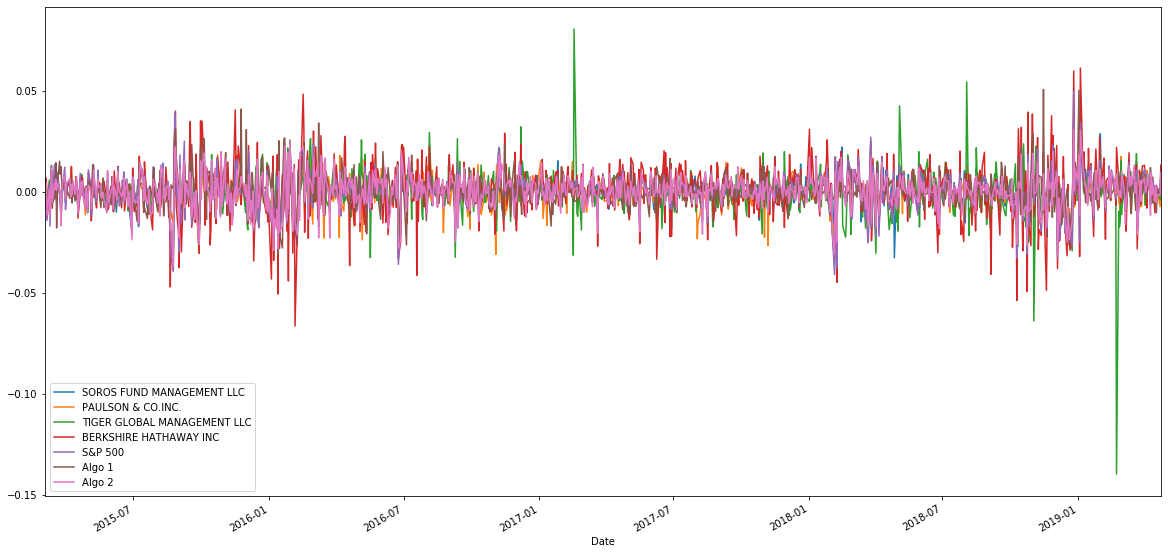

In [1136]:
# Plot daily returns
# YOUR CODE HERE
combined.plot(figsize = (20,10))

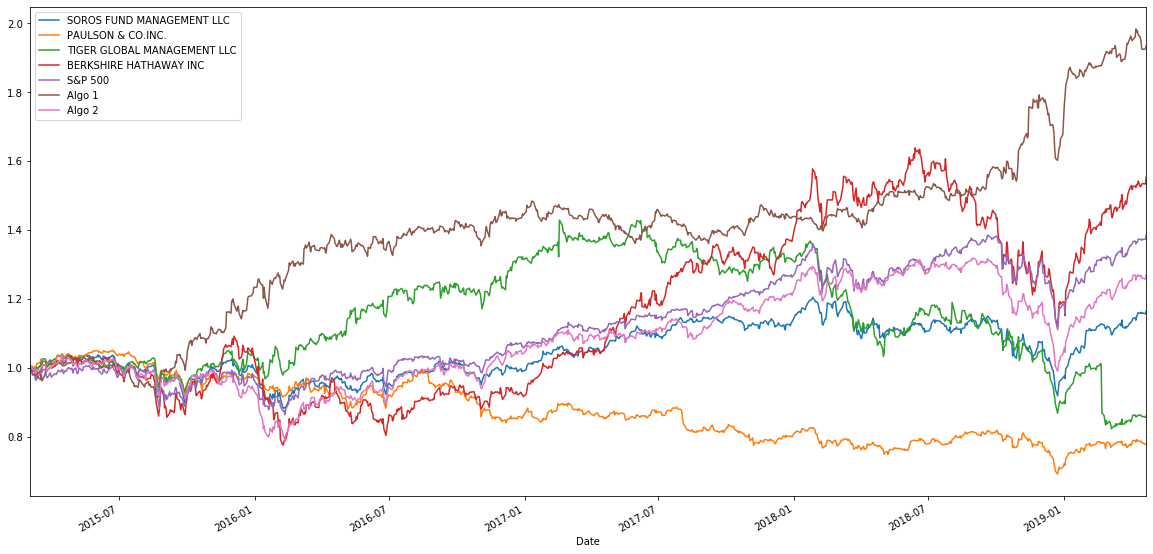

In [1189]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative = (1+ combined).cumprod()
cumulative.plot(figsize = (20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

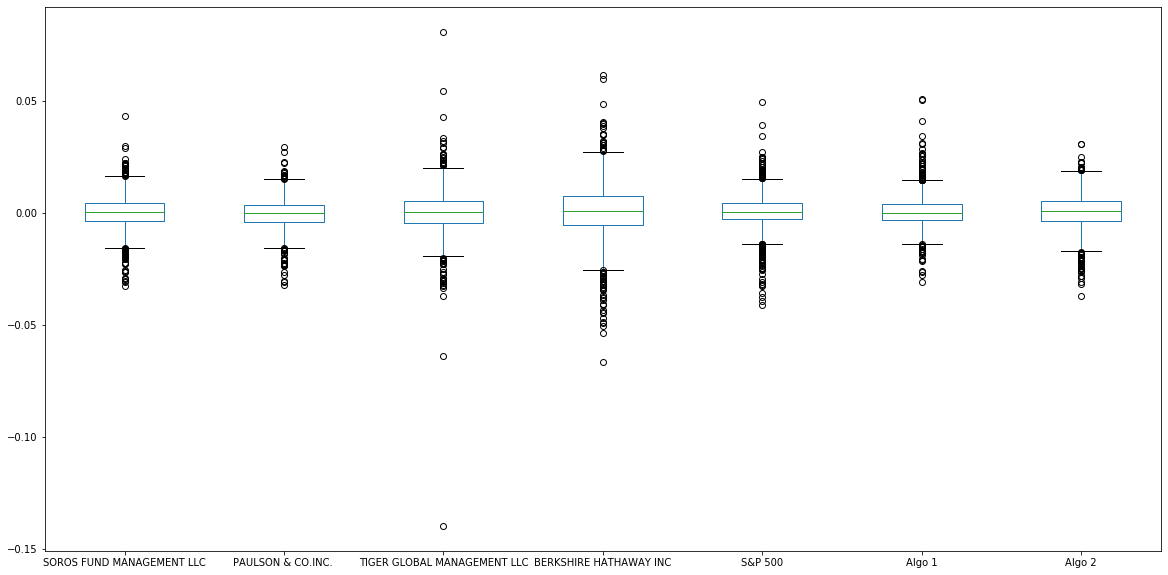

In [1215]:
# Box plot to visually show risk
# YOUR CODE HERE
combined.plot(kind = "box", figsize = (20,10))

In [1264]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
combined_std = pd.DataFrame(combined.std()).rename(columns = {0:"std"})
combined_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
S&P 500,0.008554
Algo 1,0.007620
Algo 2,0.008342


In [1465]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
higher_sp500_std = combined_std[combined_std['STD'] > combined_std.loc['S&P 500', 'STD']]

KeyError: 'STD'

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = combined_std*np.sqrt(252)
annualized_std

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

In [ ]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
sp500_rolling = combined[['S&P 500']].rolling(window=21).std() 
sp500_rolling.plot(figsize=(20,10), title='21-Day Rolling STD of S&P 500')

In [1488]:
# Correlation
# YOUR CODE HERE
correlation_sp500 = pd.DataFrame(combined.corr().loc[:,'S&P 500'])
correlation_sp500.sort_values(by='S&P 500', ascending=False, inplace=True)
correlation_sp500

,S&P 500
S&P 500,1.000000
Algo 2,0.858764
SOROS FUND MANAGEMENT LLC,0.837864
BERKSHIRE HATHAWAY INC,0.751371
PAULSON & CO.INC.,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.623946
Algo 1,0.279494


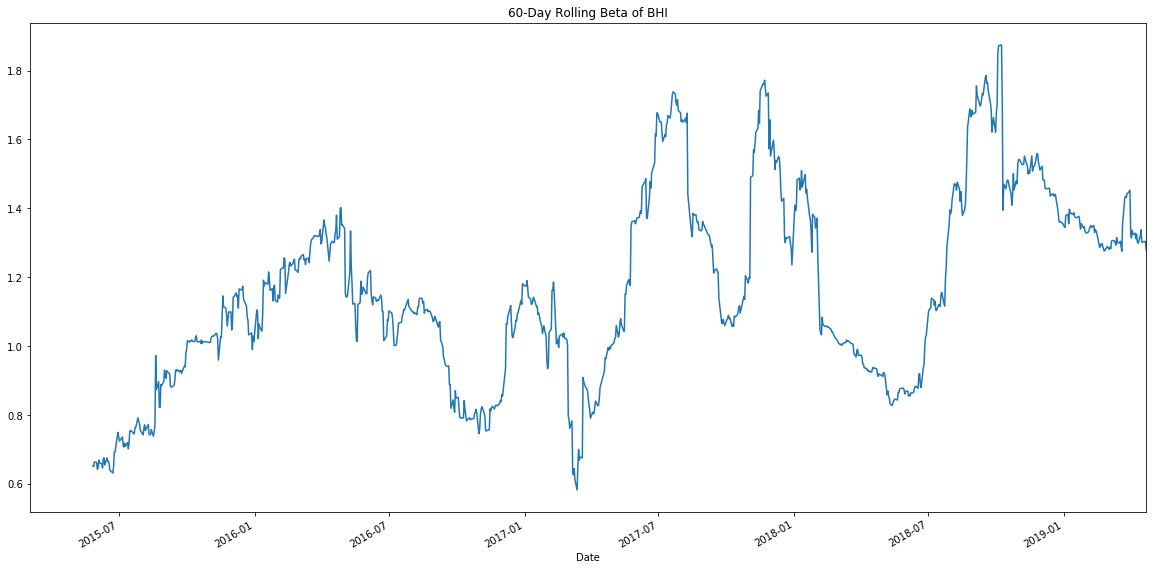

In [1527]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
sp500_rolling = combined['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined['S&P 500'])
rolling_variance = combined['S&P 500'].rolling(window=60).var()
rolling_beta = sp500_rolling / rolling_variance


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [1528]:
# (OPTIONAL) YOUR CODE HERE


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [1546]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined.mean()*252/(combined.std()*np.sqrt(252))).to_frame()
sharpe_ratios.columns = ['Sharpe Ratio']
sharpe_ratios

,Sharpe Ratio
SOROS FUND MANAGEMENT LLC,0.356417
PAULSON & CO.INC.,-0.483570
TIGER GLOBAL MANAGEMENT LLC,-0.121060
BERKSHIRE HATHAWAY INC,0.621810
S&P 500,0.648267
Algo 1,1.378648
Algo 2,0.501364


 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

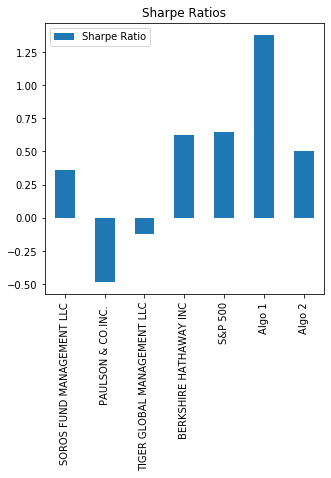

In [1563]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind = "bar", figsize=(5,5), title = "Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [1719]:
# Read the first stock
# YOUR CODE HERE
aapl_df = pd.read_csv(Path('Resources/aapl_historical.csv'), index_col='Trade DATE', 
                        infer_datetime_format=True, parse_dates = True, decimal=',')
aapl_df.sort_index(inplace=True)
aapl_df.head


<bound method NDFrame.head of            Symbol              NOCP
Trade DATE                         
2018-05-11   AAPL  188.590000000000
2018-05-14   AAPL  188.150000000000
2018-05-15   AAPL  186.440000000000
2018-05-16   AAPL  188.180000000000
2018-05-17   AAPL  186.990000000000
...           ...               ...
2019-05-03   AAPL  211.750000000000
2019-05-06   AAPL  208.480000000000
2019-05-07   AAPL  202.860000000000
2019-05-08   AAPL  202.900000000000
2019-05-09   AAPL  200.720000000000

[250 rows x 2 columns]>

In [1720]:
# Read the second stock
# YOUR CODE HERE
algo_df = pd.read_csv(Path('Resources/algo_returns.csv'), index_col='Date', 
                        infer_datetime_format=True, parse_dates = True, decimal=',')
algo_df.sort_index(inplace=True)
algo_df.head

<bound method NDFrame.head of                            Algo 1                  Algo 2
Date                                                     
2014-05-28  0.0017446466944906432                     NaN
2014-05-29   0.003978067122430204                     NaN
2014-05-30   0.004464154449145611                     NaN
2014-06-02   0.005692407792873904                     NaN
2014-06-03   0.005292254857469623                     NaN
...                           ...                     ...
2019-04-25  0.0006824649619736023  -0.0072474581025870665
2019-04-26   0.002981137543120889    0.005255642340279282
2019-04-29   0.005207920732481278    0.002829339725879474
2019-04-30  -0.002943875575463283  -0.0015696498514039202
2019-05-01  9.372168645443124e-05   -0.007358030714161396

[1241 rows x 2 columns]>

In [1734]:
# Read the third stock
# YOUR CODE HERE
goog_df = pd.read_csv(Path('Resources/goog_historical.csv'), index_col='Trade DATE', 
                        infer_datetime_format=True, parse_dates = True, decimal=',')
goog_df.sort_index(inplace=True)
goog_df.head

<bound method NDFrame.head of            Symbol               NOCP
Trade DATE                          
2018-05-11   GOOG  1098.260000000000
2018-05-14   GOOG  1100.200000000000
2018-05-15   GOOG  1079.230000000000
2018-05-16   GOOG  1081.770000000000
2018-05-17   GOOG  1078.590000000000
...           ...                ...
2019-05-03   GOOG  1185.400000000000
2019-05-06   GOOG  1189.390000000000
2019-05-07   GOOG  1174.100000000000
2019-05-08   GOOG  1166.270000000000
2019-05-09   GOOG  1162.380000000000

[250 rows x 2 columns]>

In [1747]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

all_stocks = pd.concat((aapl_df, algo_df, goog_df), axis = 1, join= "inner")
all_stocks.sort_index(ascending = True, inplace = True)
all_stocks.head()


,Symbol,NOCP,Algo 1,Algo 2,Symbol,NOCP
2018-05-11,AAPL,188.590000000000,0.00035757351454225513,0.0002813290116357553,GOOG,1098.260000000000
2018-05-14,AAPL,188.150000000000,0.0009148572982968168,0.0016348438954715886,GOOG,1100.200000000000
2018-05-15,AAPL,186.440000000000,-0.0011347640786478592,-0.00113881451557989,GOOG,1079.230000000000
2018-05-16,AAPL,188.180000000000,-0.002326458322317707,0.0033408131730310493,GOOG,1081.770000000000
2018-05-17,AAPL,186.990000000000,-0.006949258300842096,0.005204873576385497,GOOG,1078.590000000000


In [1759]:
# Reset the index
# YOUR CODE HERE
all_stocks.index = all_stocks.index.normalize()

In [1780]:
# Drop Nulls
# YOUR CODE HERE
all_stocks.dropna(inplace=True)
all_stocks.head()

,Symbol,NOCP,Algo 1,Algo 2,Symbol,NOCP
2018-05-11,AAPL,188.590000000000,0.00035757351454225513,0.0002813290116357553,GOOG,1098.260000000000
2018-05-14,AAPL,188.150000000000,0.0009148572982968168,0.0016348438954715886,GOOG,1100.200000000000
2018-05-15,AAPL,186.440000000000,-0.0011347640786478592,-0.00113881451557989,GOOG,1079.230000000000
2018-05-16,AAPL,188.180000000000,-0.002326458322317707,0.0033408131730310493,GOOG,1081.770000000000
2018-05-17,AAPL,186.990000000000,-0.006949258300842096,0.005204873576385497,GOOG,1078.590000000000


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [2059]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]


In [2060]:
portfolio = all_stocks.dot(weights)
portfolio_return = portfolio.pct_change()
portfolio_return.dropna(inplace = True)
portfolio_return.head()

ValueError: Dot product shape mismatch, (244, 6) vs (3,)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [2082]:
# YOUR CODE HERE
portfolio_joined = pd.concat((portfolio_return,combined), axis = 1, join = "inner")
portfolio_joined.rename(columns = {0:"portfolio_return"}, inplace = True)
portfolio_joined

NameError: name 'portfolio_return' is not defined

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
portfolio_joined.dropna(inplace=True)
portfolio_joined

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [ ]:
# Risk
# YOUR CODE HERE
portfolio_std = pd.DataFrame(portfolio_joined.std()).rename(columns = {0:"std"})
portfolio_std

In [ ]:
# Rolling
# YOUR CODE HERE
portfolio_joined.rolling(window=21).std().plot(figsize=(25,10))

In [2090]:
# Beta
# YOUR CODE HERE
covariance_portfolio = portfolio_joined['My Portfolio'].cov(all_portfolios['My Portfolio'])
variance = combined_returns_df['S&P 500'].var()
portfolio_beta = covariance_portfolio / variance
portfolio_beta

NameError: name 'portfolio_joined' is not defined

In [ ]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
all_sharpe_ratios = (portfolios_joined.mean()* 252)/ (portfolios_joined.std() * np.sqrt(252))
all_sharpe_ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
all_sharpe_ratios.plot(kind="bar",figsize=(5,5), title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [ ]:
# YOUR CODE HERE